<a href="https://colab.research.google.com/github/garfield-gray/MachineLearning/blob/main/pytorch/2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear

In [38]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    ) # keep random state so we get the same values

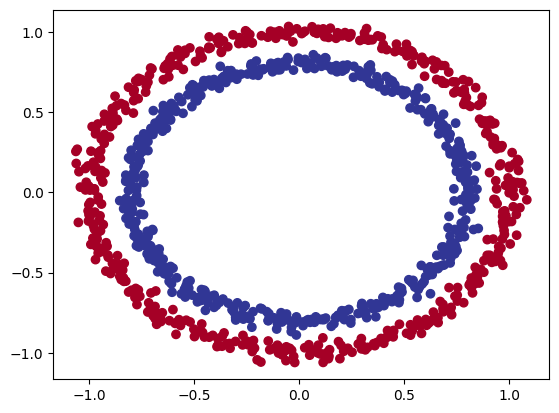

In [39]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [40]:
# prompt: turn X and y into torch.tensor format and split them into train and test

import torch
from sklearn.model_selection import train_test_split

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [41]:
# Replicate CircleModelV0 with nn.Sequential
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
model_0 = nn.Sequential(

    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0805,  0.5666],
                      [-0.1722, -0.2122],
                      [-0.6763, -0.5414],
                      [ 0.5323, -0.3664],
                      [-0.1466,  0.5606]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2231, -0.1325,  0.0555,  0.1597,  0.1258], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0016,  0.0468,  0.1521, -0.0834,  0.2822]], device='cuda:0')),
             ('1.bias', tensor([0.4088], device='cuda:0'))])

In [42]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5854, -0.0626],
                      [-0.0334,  0.7024],
                      [ 0.4076, -0.5238],
                      [-0.6246, -0.2943],
                      [-0.5727,  0.0773]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3476,  0.7057, -0.5143,  0.5563,  0.1567], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0841, -0.1357, -0.0476, -0.1967,  0.2696]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.0262], device='cuda:0'))])

In [43]:
# the digital playground thing for neural network is amaizing:)

In [44]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.1)

In [45]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [46]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1735],
        [-0.1791],
        [-0.2006],
        [-0.0606],
        [-0.0775]], device='cuda:0', grad_fn=<SliceBackward0>)

In [47]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4567],
        [0.4553],
        [0.4500],
        [0.4849],
        [0.4806]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [48]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [49]:
__doc__

'Automatically created module for IPython interactive environment'

In [50]:
l = dir()

In [51]:
print(l)

['CircleModelV0', 'CircleModelV2', 'In', 'Out', 'X', 'X_test', 'X_train', '_', '_41', '_42', '_46', '_47', '_48', '_49', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i40', '_i41', '_i42', '_i43', '_i44', '_i45', '_i46', '_i47', '_i48', '_i49', '_i5', '_i50', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'accuracy_fn', 'device', 'exit', 'get_ipython', 'loss_fn', 'make_circles', 'model_0', 'n_samples', 'nn', 'optimizer', 'plt', 'quit', 'torch', 'train_test_split', 'y', 'y_logits', 'y_pred_labels', 'y_pred_probs', 'y_preds', 'y_test', 'y_train']


In [52]:
__builtins__

<module 'builtins' (built-in)>

In [53]:
for i,j in zip(dir(), range(len(l))):
    print(j,i)

0 CircleModelV0
1 CircleModelV2
2 In
3 Out
4 X
5 X_test
6 X_train
7 _
8 _41
9 _42
10 _46
11 _47
12 _48
13 _49
14 _52
15 __
16 ___
17 __builtin__
18 __builtins__
19 __doc__
20 __loader__
21 __name__
22 __package__
23 __spec__
24 _dh
25 _exit_code
26 _i
27 _i1
28 _i10
29 _i11
30 _i12
31 _i13
32 _i14
33 _i15
34 _i16
35 _i17
36 _i18
37 _i19
38 _i2
39 _i20
40 _i21
41 _i22
42 _i23
43 _i24
44 _i25
45 _i26
46 _i27
47 _i28
48 _i29
49 _i3
50 _i30
51 _i31
52 _i32
53 _i33
54 _i34
55 _i35
56 _i36
57 _i37
58 _i38
59 _i39
60 _i4
61 _i40
62 _i41
63 _i42
64 _i43
65 _i44
66 _i45
67 _i46
68 _i47
69 _i48
70 _i49
71 _i5
72 _i50
73 _i51
74 _i52
75 _i53
76 _i6
77 _i7
78 _i8
79 _i9
80 _ih
81 _ii
82 _iii
83 _oh
84 accuracy_fn
85 device
86 exit
87 get_ipython
88 l
89 loss_fn
90 make_circles
91 model_0
92 n_samples
93 nn
94 optimizer
95 plt
96 quit
97 torch
98 train_test_split
99 y
100 y_logits


In [54]:
# dir(), globals(), locals() five you the spection that you want!

In [55]:
y_test[:10]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.]])

In [56]:
torch.round(torch.sigmoid(model_0(X_test[:10].to(device))))

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [57]:
# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


In [58]:

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy

    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train.squeeze())
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test.squeeze())
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69505, Accuracy: 40700.00% | Test loss: 0.69296, Test acc: 10686.00%
Epoch: 10 | Loss: 0.69439, Accuracy: 39300.00% | Test loss: 0.69190, Test acc: 10700.00%
Epoch: 20 | Loss: 0.69310, Accuracy: 40700.00% | Test loss: 0.69576, Test acc: 9307.00%
Epoch: 30 | Loss: 0.69293, Accuracy: 40679.00% | Test loss: 0.69636, Test acc: 9300.00%
Epoch: 40 | Loss: 0.69296, Accuracy: 40140.00% | Test loss: 0.69479, Test acc: 9832.00%
Epoch: 50 | Loss: 0.69291, Accuracy: 40700.00% | Test loss: 0.69536, Test acc: 9391.00%
Epoch: 60 | Loss: 0.69291, Accuracy: 40689.50% | Test loss: 0.69569, Test acc: 9300.00%
Epoch: 70 | Loss: 0.69290, Accuracy: 40442.75% | Test loss: 0.69551, Test acc: 9503.00%
Epoch: 80 | Loss: 0.69290, Accuracy: 40488.25% | Test loss: 0.69529, Test acc: 9503.00%
Epoch: 90 | Loss: 0.69290, Accuracy: 40540.75% | Test loss: 0.69540, Test acc: 9503.00%


In [59]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [60]:

from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  !wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


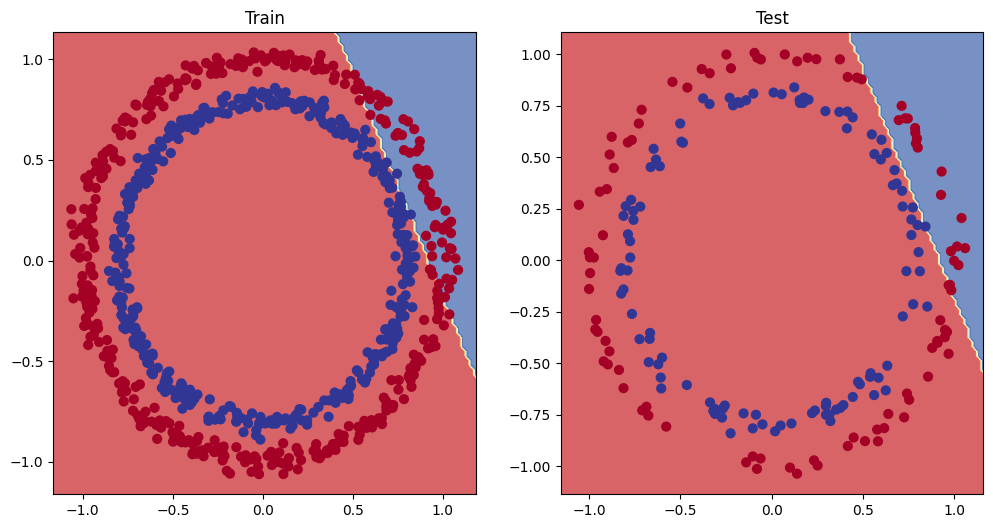

In [61]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [62]:
!pwd

/content/.config/logs/2024.10.01


In [63]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

# Nonlinear

In [64]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [65]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [66]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train.squeeze()) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test.squeeze())
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69455, Accuracy: 40700.00% | Test Loss: 0.69756, Test Accuracy: 9300.00%
Epoch: 100 | Loss: 0.69294, Accuracy: 40700.00% | Test Loss: 0.69485, Test Accuracy: 9300.00%
Epoch: 200 | Loss: 0.69063, Accuracy: 40593.25% | Test Loss: 0.69243, Test Accuracy: 9405.00%
Epoch: 300 | Loss: 0.68889, Accuracy: 40497.00% | Test Loss: 0.69118, Test Accuracy: 9517.00%
Epoch: 400 | Loss: 0.68638, Accuracy: 40399.00% | Test Loss: 0.68923, Test Accuracy: 9601.00%
Epoch: 500 | Loss: 0.68265, Accuracy: 40339.50% | Test Loss: 0.68632, Test Accuracy: 9692.00%
Epoch: 600 | Loss: 0.67693, Accuracy: 40297.50% | Test Loss: 0.68179, Test Accuracy: 9706.00%
Epoch: 700 | Loss: 0.66750, Accuracy: 40259.00% | Test Loss: 0.67397, Test Accuracy: 9699.00%
Epoch: 800 | Loss: 0.65093, Accuracy: 40224.00% | Test Loss: 0.65878, Test Accuracy: 9783.00%
Epoch: 900 | Loss: 0.62087, Accuracy: 40082.25% | Test Loss: 0.62756, Test Accuracy: 9916.00%


In [67]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels


(tensor([1., 1., 1., 1., 0., 1., 1., 0., 0., 1.], device='cuda:0'),
 tensor([[0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [1.]]))

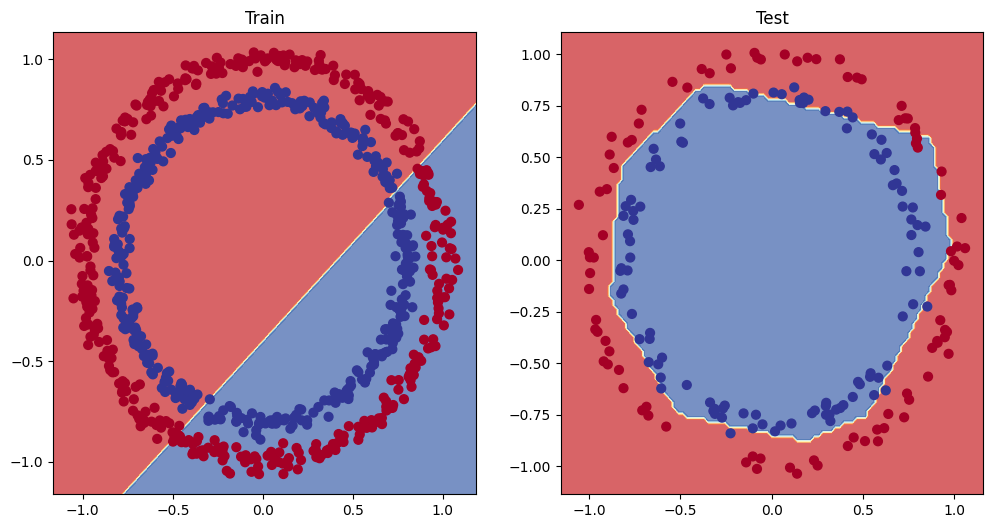

In [68]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


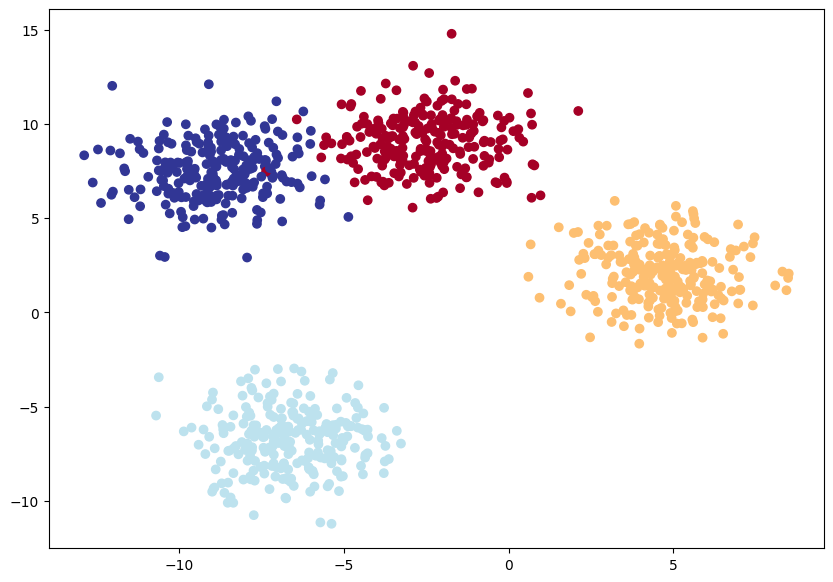

In [69]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);



In [70]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [71]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [72]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [73]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()
    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


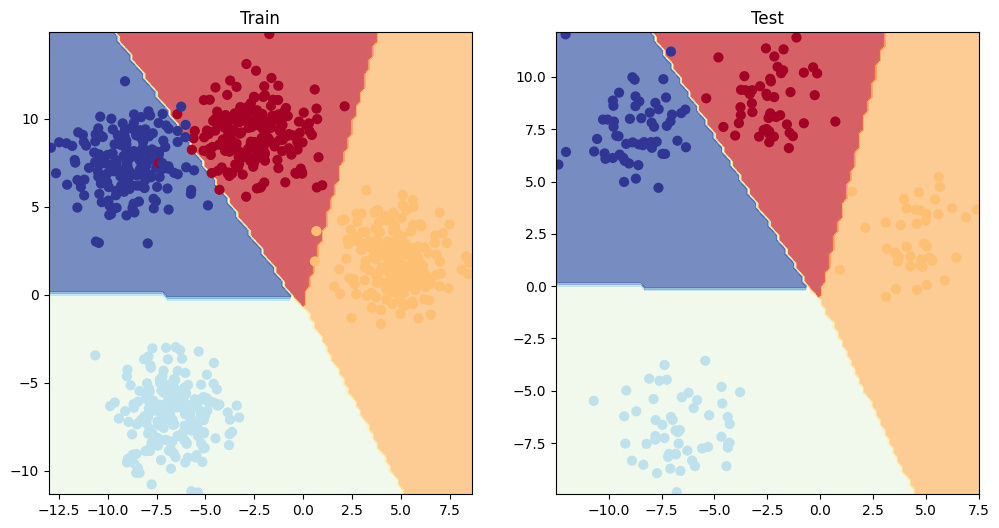

In [74]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)


# Some linux play

In [34]:
%cd /content
%cd .config/logs
!ls

/content
/content/.config/logs
2024.10.01


In [35]:
%cd '2024.10.01'
!ls

/content/.config/logs/2024.10.01
16.11.43.830597.log  16.12.18.079304.log  16.12.31.998949.log  f.txt
16.12.05.413484.log  16.12.19.078636.log  16.12.32.744907.log


In [36]:
!cat '16.12.32.744907.log'

2024-10-01 16:12:32,747 DEBUG    root            Loaded Command Group: ['gcloud', 'config']
2024-10-01 16:12:32,802 DEBUG    root            Loaded Command Group: ['gcloud', 'config', 'set']
2024-10-01 16:12:32,805 DEBUG    root            Running [gcloud.config.set] with arguments: [SECTION/PROPERTY: "compute/gce_metadata_read_timeout_sec", VALUE: "0"]
2024-10-01 16:12:32,806 INFO     ___FILE_ONLY___ Updated property [compute/gce_metadata_read_timeout_sec].

2024-10-01 16:12:32,807 DEBUG    root            Chosen display Format:default
2024-10-01 16:12:32,808 INFO     root            Display format: "default"
2024-10-01 16:12:32,808 DEBUG    root            SDK update checks are disabled.
